# Social Network Analysis Assignment

## Analysing Game of Thrones Season 1 Data

In [1]:
!pip install infomap

In [17]:
!pip install cdlib

In [30]:
!pip install wurlitzer

In [18]:
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import infomap
import cdlib
from cdlib import algorithms, viz, evaluation

In [2]:
got_s1_edges = pd.read_csv('data/got-s1-edges.csv')
got_s1_nodes = pd.read_csv('data/got-s1-nodes.csv')

In [9]:
got_s1_edges.head()

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


In [10]:
got_s1_edges.shape

(549, 4)

In [11]:
got_s1_nodes.head()

,Id,Label
0,ADDAM_MARBRAND,Addam
1,AEGON,Aegon
2,AERYS,Aerys
3,ALLISER_THORNE,Allister
4,ARYA,Arya


In [12]:
got_s1_nodes.shape

(126, 2)

In [3]:
G = nx.from_pandas_edgelist(df=got_s1_edges, source="Source", target="Target", create_using=nx.DiGraph(), edge_attr="Weight")

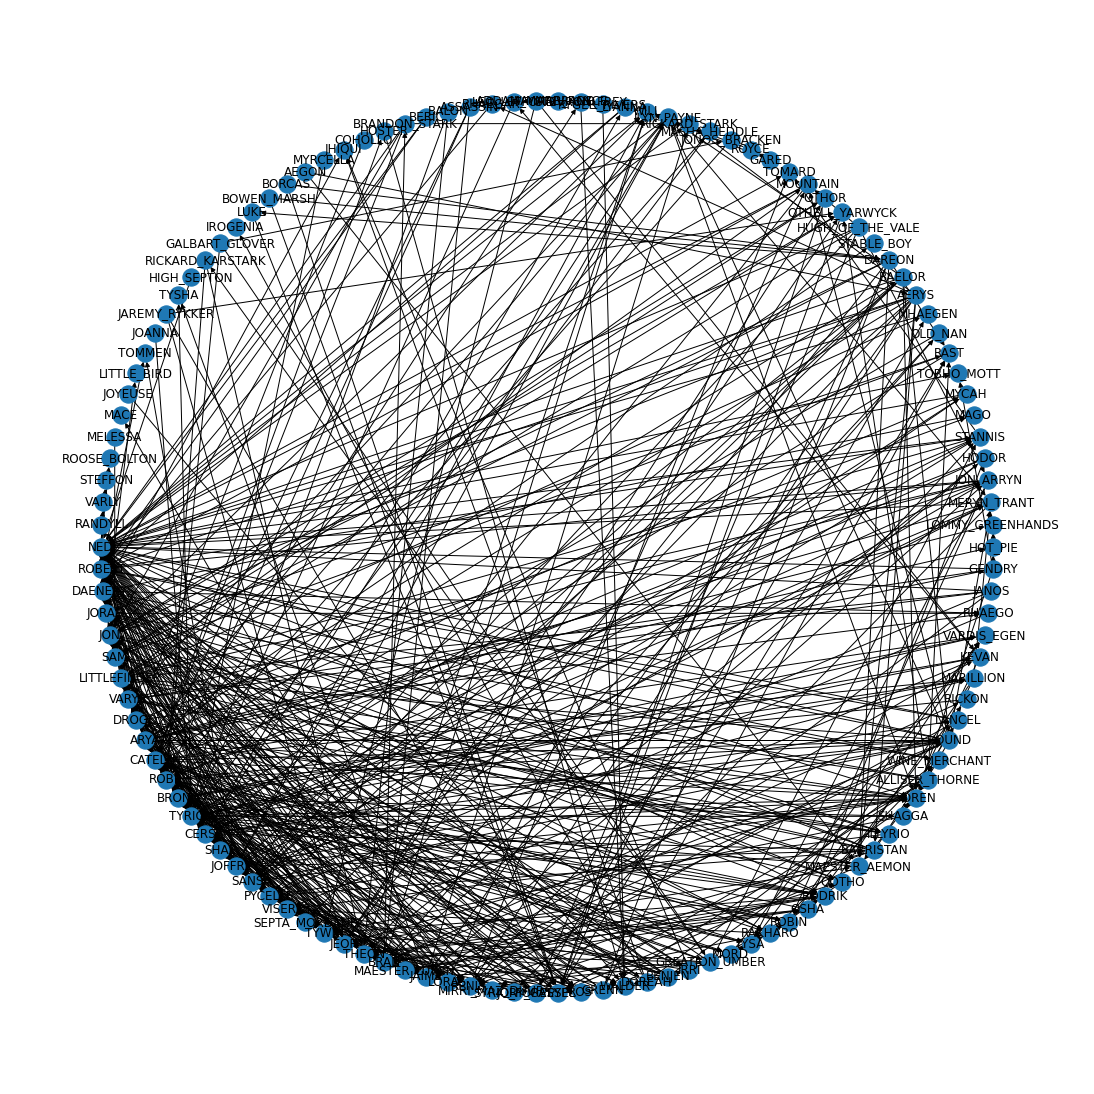

In [14]:
figure(figsize=(15, 15))
nx.draw_shell(G, with_labels=True)

In [15]:
G['NED']['ROBERT']

{'Weight': 192}

In [4]:
nodes_interest = list(got_s1_edges[got_s1_edges.Target == "JON"].Source.head(20)) + ["JON"]

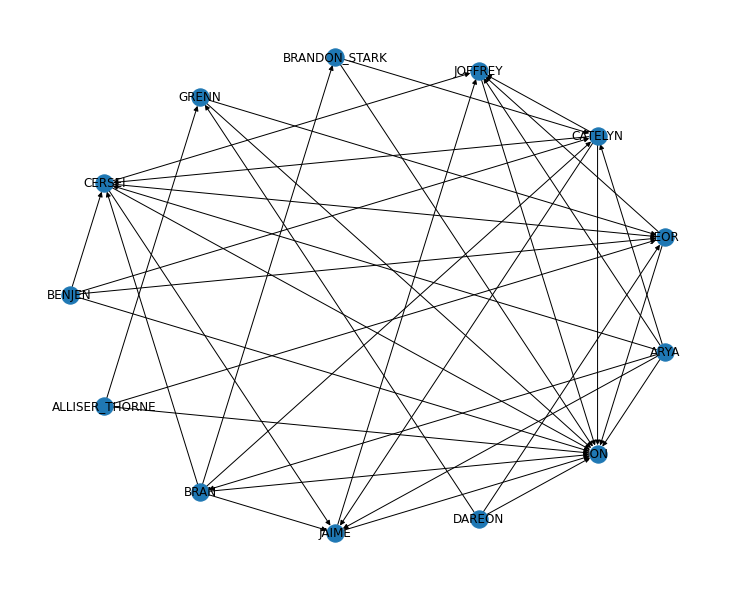

In [17]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=nodes_interest), with_labels=True)

### Graph Metrics

In [18]:
len(G.nodes)

126

In [19]:
len(G.edges)

549

In [20]:
G.in_degree["JON"]

12

In [21]:
G.out_degree["JON"]

14

In [22]:
list(G.neighbors(n="JON"))

['SAM',
 'TYRION',
 'PYP',
 'NED',
 'MAESTER_AEMON',
 'ROBB',
 'RAST',
 'THEON',
 'OTHELL_YARWYCK',
 'OTHOR',
 'ROBERT',
 'WILL',
 'RODRIK',
 'ROS']

In [5]:
len(list(G.neighbors(n="JON")))

14

In [23]:
list(G.predecessors(n="JON"))

['JEOR',
 'BENJEN',
 'GRENN',
 'ALLISER_THORNE',
 'ARYA',
 'BRAN',
 'CATELYN',
 'JAIME',
 'DAREON',
 'CERSEI',
 'BRANDON_STARK',
 'JOFFREY']

In [6]:
len(list(G.predecessors(n="JON")))

12

In [24]:
list(G.successors(n="JON"))

['SAM',
 'TYRION',
 'PYP',
 'NED',
 'MAESTER_AEMON',
 'ROBB',
 'RAST',
 'THEON',
 'OTHELL_YARWYCK',
 'OTHOR',
 'ROBERT',
 'WILL',
 'RODRIK',
 'ROS']

In [7]:
len(list(G.successors(n="JON")))

14

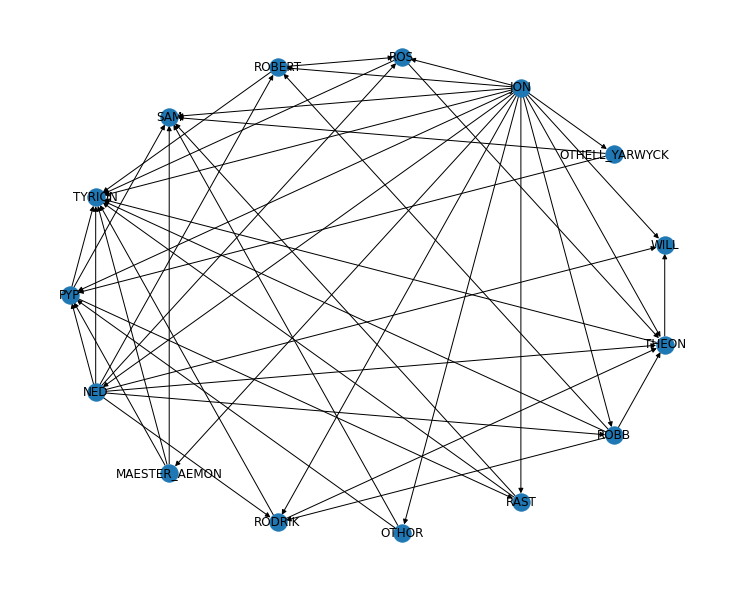

In [25]:
figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=list(G.successors(n="JON")) + ["JON"]), with_labels=True)

### Path

Simple Path between Jon and Tyrion

In [26]:
list(nx.simple_paths.all_simple_paths(G, source="JON", target="TYRION"))

[['JON', 'TYRION'],
 ['JON', 'PYP', 'RAST', 'TYRION'],
 ['JON', 'PYP', 'TYRION'],
 ['JON', 'NED', 'ROBERT', 'TYRION'],
 ['JON', 'NED', 'ROBERT', 'ROS', 'THEON', 'TYRION'],
 ['JON', 'NED', 'ROBERT', 'ROS', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'ROBERT', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'ROBERT', 'ROS', 'THEON', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'ROBERT', 'ROS', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'ROS', 'THEON', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'ROS', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'RENLY', 'ROBERT', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'RENLY', 'ROBERT', 'ROS', 'THEON', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'RENLY', 'ROBERT', 'ROS', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'RENLY', 'ROBB', 'THEON', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'RENLY', 'ROBB', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'RENLY', 'ROBB', 'RODRIK', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'RENLY', 'ROBB', 'RODRIK', 'THEON', 'TYRION'],
 ['JON', 'NED', 'PYCELLE', 'RENLY', 'ROBB', 'ROBERT', 'TYRION'],
 

In [8]:
len(list(nx.simple_paths.all_simple_paths(G, source="JON", target="TYRION")))

69

Shortest path between Jon and Tyrion

In [27]:
list(nx.shortest_path(G, source="JON", target="TYRION"))

['JON', 'TYRION']

Number of edges in this shortest path

In [28]:
nx.shortest_path_length(G, source="JON", target="TYRION")

1

### Node importance: Top 10 Important Characters

1. Using Degree Centrality

In [9]:
result = nx.degree_centrality(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [10]:
sorted_d[0:10]

[('NED', 0.456),
 ('TYRION', 0.328),
 ('ROBERT', 0.28800000000000003),
 ('CATELYN', 0.28800000000000003),
 ('ROBB', 0.24),
 ('CERSEI', 0.232),
 ('ARYA', 0.224),
 ('JOFFREY', 0.216),
 ('JON', 0.20800000000000002),
 ('LITTLEFINGER', 0.20800000000000002)]

2. Betweenness Centrality

In [11]:
result = nx.betweenness_centrality(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [12]:
sorted_d[0:10]

[('NED', 0.05032963094253417),
 ('CATELYN', 0.020911751152073735),
 ('ROBERT', 0.011939666784828076),
 ('JON', 0.010778455236519754),
 ('TYRION', 0.01046876993973768),
 ('JORAH', 0.010049539170506912),
 ('ROBB', 0.00917674583481035),
 ('JOFFREY', 0.0090906987277955),
 ('JEOR', 0.009075186104218362),
 ('JAIME', 0.008857066052227344)]

3. Closeness Centrality

In [13]:
result = nx.closeness_centrality(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [14]:
sorted_d[0:10]

[('TYRION', 0.41813333333333336),
 ('VARYS', 0.36299386503067477),
 ('TYWIN', 0.3481927710843374),
 ('YOREN', 0.3364),
 ('ROBERT', 0.30068686868686867),
 ('NED', 0.2898550724637681),
 ('THEON', 0.2762461538461538),
 ('SANSA', 0.2697543859649123),
 ('TYSHA', 0.2675925925925926),
 ('ROBB', 0.25785185185185183)]

4. Page Rank

In [15]:
result = nx.pagerank(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [16]:
sorted_d[0:10]

[('TYRION', 0.070613569335847),
 ('YOREN', 0.05943461383562543),
 ('VARYS', 0.03625353588888158),
 ('TYWIN', 0.0350771241609703),
 ('NED', 0.028745677171241147),
 ('SAM', 0.027982708453893612),
 ('ROBERT', 0.023862657731666972),
 ('WALDER', 0.023777703572900367),
 ('ROBB', 0.023244685961989912),
 ('THEON', 0.022313028935806743)]

### Community Detection

1. Using Girvan & Newman (Edge - Between) Clustering

In [19]:
pos = nx.layout.fruchterman_reingold_layout(G)

In [20]:
coms_edge_betweenness = algorithms.girvan_newman(G, level=4)

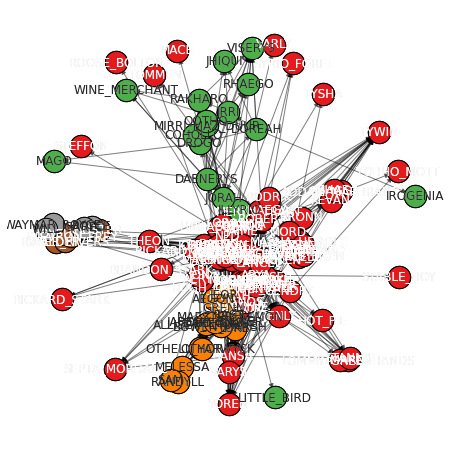

In [61]:
viz.plot_network_clusters(G, coms_edge_betweenness, pos, plot_labels=True, node_size=500, cmap='Set1')

In [33]:
print("Community List: " + str(coms_edge_betweenness.communities))
print("Conductance: " + str(coms_edge_betweenness.conductance()))
print("Expansion: " + str(coms_edge_betweenness.expansion()))
print("Internal Density: " + str(coms_edge_betweenness.internal_edge_density()))

Community List: [['TYWIN', 'KEVAN', 'ADDAM_MARBRAND', 'ASSASSIN', 'SHAGGA', 'STEFFON', 'NED', 'GENDRY', 'OLD_NAN', 'TOBHO_MOTT', 'MYCAH', 'BALON', 'ROBIN', 'LYANNA', 'AERYS', 'JAIME', 'RHAEGAR', 'SANSA', 'HUGH_OF_THE_VALE', 'BERIC', 'VARYS', 'MOUNTAIN', 'BRAN', 'VARLY', 'MYRCELLA', 'LOMMY_GREENHANDS', 'TYSHA', 'BAELOR', 'BRONN', 'ROBERT', 'MERYN_TRANT', 'PYCELLE', 'BRANDON_STARK', 'THEON', 'SYRIO_FOREL', 'MARILLION', 'LYSA', 'MACE', 'MHAEGEN', 'JON', 'HOUND', 'RODRIK', 'RENLY', 'SHAE', 'JONOS_BRACKEN', 'JANOS', 'YOREN', 'JON_ARRYN', 'JORY_CASSEL', 'LORAS', 'MASHA_HEDDLE', 'BARRISTAN', 'MORD', 'ILYN_PAYNE', 'HODOR', 'TOMMEN', 'HOT_PIE', 'JOFFREY', 'GREATJON_UMBER', 'MAESTER_LUWIN', 'BENJEN', 'TYRION', 'ARYA', 'HIGH_SEPTON', 'SEPTA_MORDANE', 'STABLE_BOY', 'RICKARD_KARSTARK', 'VARDIS_EGEN', 'LEO_LEFFORD', 'RICKARD_STARK', 'ROBB', 'JOANNA', 'TOMARD', 'LITTLEFINGER', 'STANNIS', 'RICKON', 'GALBART_GLOVER', 'OSHA', 'ROS', 'ROOSE_BOLTON', 'CATELYN', 'CERSEI', 'LANCEL'], ['WINE_MERCHANT', 'VISE

In [62]:
len(coms_edge_betweenness.communities)

5

2. Louvain Modularity

In [25]:
G_1 = nx.from_pandas_edgelist(df=got_s1_edges, source="Source", target="Target", create_using=nx.Graph(), edge_attr="Weight")

In [26]:
coms_louvain = cdlib.algorithms.louvain(G_1, resolution=1)
print("Community List: " + str(coms_louvain.communities))
print("Conductance: " + str(coms_louvain.conductance()))
print("Expansion: " + str(coms_louvain.expansion()))
print("Internal Density: " + str(coms_louvain.internal_edge_density()))

Community List: [['NED', 'ROBERT', 'LITTLEFINGER', 'VARYS', 'ARYA', 'CERSEI', 'JOFFREY', 'SANSA', 'PYCELLE', 'SEPTA_MORDANE', 'LORAS', 'RENLY', 'SYRIO_FOREL', 'JORY_CASSEL', 'ROS', 'BARRISTAN', 'YOREN', 'HOUND', 'LANCEL', 'JANOS', 'GENDRY', 'HOT_PIE', 'LOMMY_GREENHANDS', 'MERYN_TRANT', 'JON_ARRYN', 'STANNIS', 'MYCAH', 'TOBHO_MOTT', 'MHAEGEN', 'BAELOR', 'STABLE_BOY', 'HUGH_OF_THE_VALE', 'MOUNTAIN', 'TOMARD', 'ILYN_PAYNE', 'LYANNA', 'BERIC', 'HIGH_SEPTON', 'TOMMEN', 'MACE', 'ROOSE_BOLTON', 'STEFFON', 'VARLY'], ['CATELYN', 'ROBB', 'BRONN', 'TYRION', 'SHAE', 'TYWIN', 'THEON', 'BRAN', 'MAESTER_LUWIN', 'JAIME', 'WALDER', 'GREATJON_UMBER', 'MORD', 'LYSA', 'ROBIN', 'OSHA', 'RODRIK', 'SHAGGA', 'RICKON', 'MARILLION', 'KEVAN', 'VARDIS_EGEN', 'HODOR', 'OLD_NAN', 'JONOS_BRACKEN', 'MASHA_HEDDLE', 'RYGER_RIVERS', 'STEVRON_FREY', 'ADDAM_MARBRAND', 'LEO_LEFFORD', 'ASSASSIN', 'BALON', 'HOSTER', 'MYRCELLA', 'GALBART_GLOVER', 'RICKARD_KARSTARK', 'TYSHA', 'JOANNA', 'JOYEUSE'], ['JON', 'SAM', 'JEOR', 'PYP',

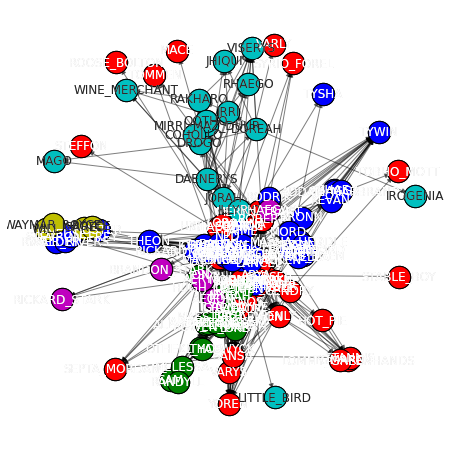

In [56]:
viz.plot_network_clusters(G, coms_louvain, pos, plot_labels=True, node_size=500)

In [63]:
len(coms_louvain.communities)

6

### Comparing the Two Clusters

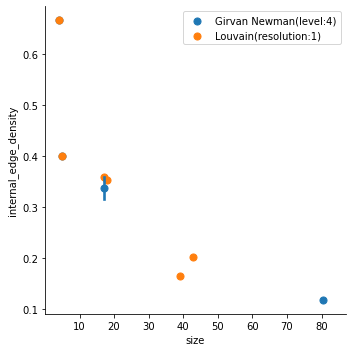

In [64]:
lmplot = viz.plot_com_properties_relation([coms_edge_betweenness,coms_louvain],evaluation.size,evaluation.internal_edge_density)

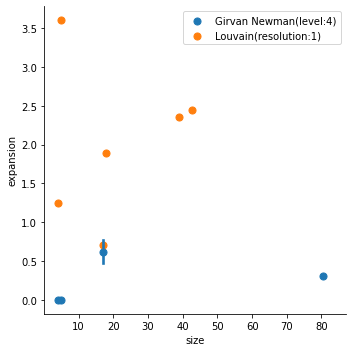

In [66]:
lmplot = viz.plot_com_properties_relation([coms_edge_betweenness,coms_louvain],evaluation.size,evaluation.expansion)

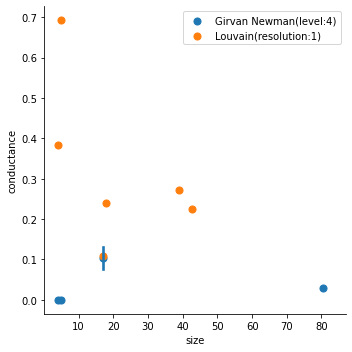

In [68]:
lmplot = viz.plot_com_properties_relation([coms_edge_betweenness,coms_louvain],evaluation.size,evaluation.conductance)